<center><font size="5">Maharajwala_Raj_HW1</font></center>
<br>
<center><font size="4">Vertebral Column Data</font></center>

Name: Raj Vijay Maharajala 

Github Username: RajMaharajwala

USC ID: 4863-3649-66

### (a) Download Data

Package imports

In [1]:
!pip install arff
!pip install plotly
!pip install cufflinks
!pip install beautifultable

In [2]:
import numpy as np
import pandas as pd
from scipy.io.arff import loadarff 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, f1_score, precision_score
from sklearn.preprocessing import StandardScaler 
from plotly.offline import iplot
import plotly as py
import plotly.tools as tls
from beautifultable import BeautifulTable
import cufflinks as cf
import warnings
sns.set()

In [3]:
warnings.simplefilter(action='ignore', category=FutureWarning)

Get the Vertebral Column Data Set

In [4]:
data1 = loadarff('../data/vertebral_column_data/column_2C_weka.arff')
df1 = pd.DataFrame(data1[0])

#data2 = loadarff('../data/vertebral_column_data/column_3C_weka.arff')
#df2 = pd.DataFrame(data2[0])
#print(df2['class'].unique())
#df2.head()

In [5]:
print(df1['class'].unique())
df1.head()

[b'Abnormal' b'Normal']


,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,b'Abnormal'
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,b'Abnormal'
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,b'Abnormal'
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,b'Abnormal'
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,b'Abnormal'


In [6]:
df1["class"] = df1["class"].replace(to_replace=[b'Normal', b'Abnormal'], value=[0, 1])
df1["class"].unique()

array([1, 0], dtype=int64)

### (b) Pre-Processing and Exploratory Data Analysis

#### i. Pairplot Scatterplots

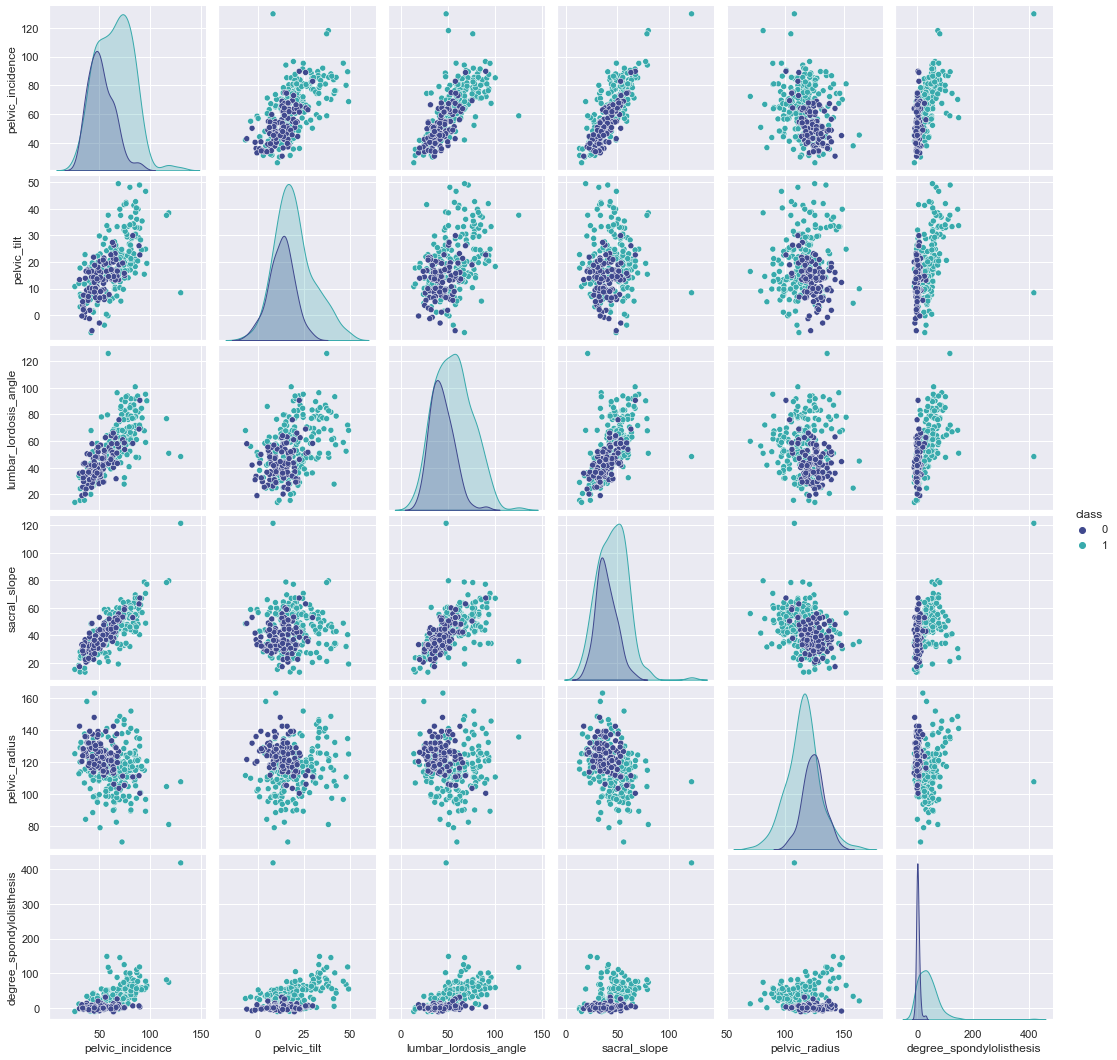

In [7]:
sns.pairplot(df1 , hue = 'class' , kind = 'scatter' , palette="mako")  #hue = 'class' to seperate class 0 and 1 with different color

#### ii. Boxplots

In [8]:
df1.columns

Index(['pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_angle',
       'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis', 'class'],
      dtype='object')

<AxesSubplot:xlabel='class', ylabel='degree_spondylolisthesis'>

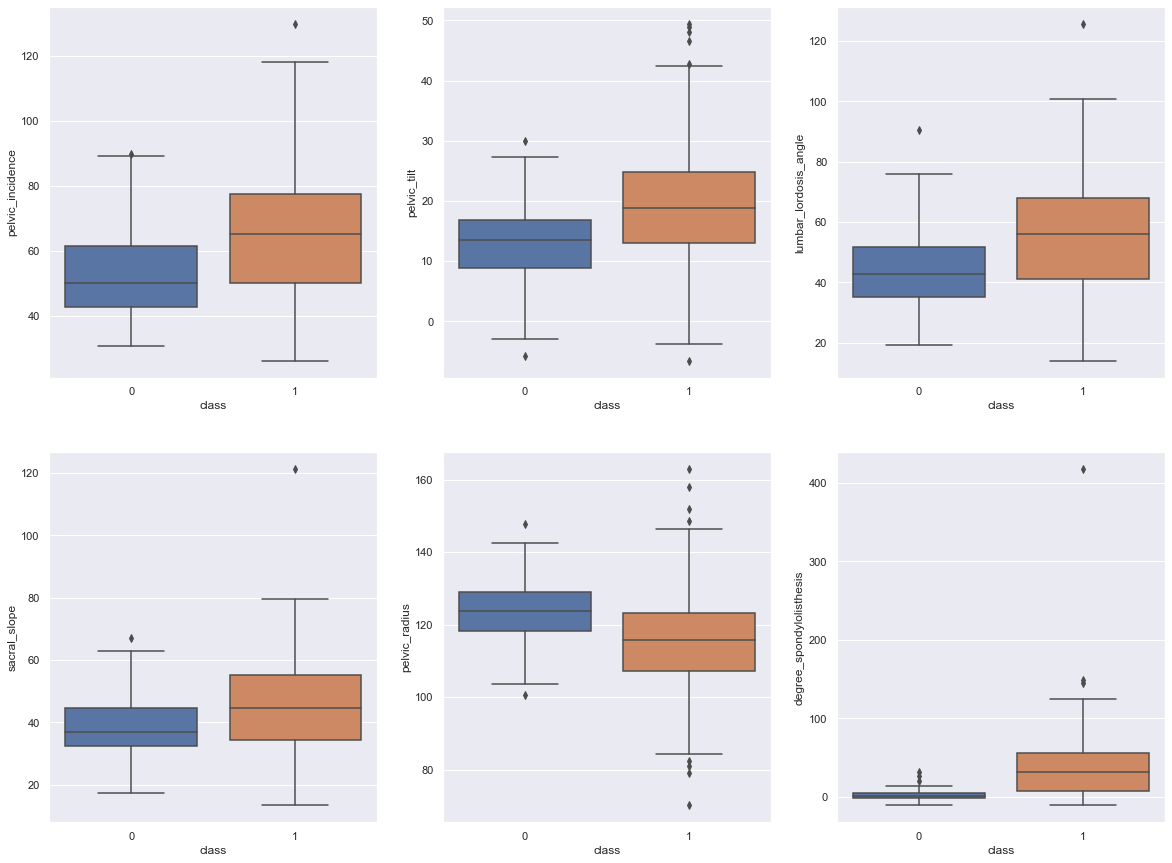

In [9]:
fig,ax=plt.subplots(nrows=2,ncols=3,figsize=(20,15))

sns.boxplot(x="class", y="pelvic_incidence", data=df1 , ax=ax[0][0])
sns.boxplot(x="class", y="pelvic_tilt", data=df1, ax=ax[0][1])
sns.boxplot(x="class", y="lumbar_lordosis_angle", data=df1 , ax=ax[0][2])
sns.boxplot(x="class", y="sacral_slope", data=df1 , ax=ax[1][0])
sns.boxplot(x="class", y="pelvic_radius", data=df1, ax=ax[1][1])
sns.boxplot(x="class", y="degree_spondylolisthesis", data=df1 , ax=ax[1][2])

# also by df1.boxplot(column=['pelvic_incidence', 'pelvic_tilt' , 'lumbar_lordosis_angle' , ....] , by='class' , return_type="axes" , figsize = (10,10))   

In [10]:
#For checking outlier for independent variables
# fig, ax = plt.subplots(figsize=(15,7))
# sns.boxplot(data=df1.drop(columns = ['class']), width= 0.5,ax=ax,  fliersize=3)

#### iii. Split Data Set

In [11]:
dfclass0 , dfclass1 = df1[df1['class']==0] , df1[df1['class']==1]

dftrain = dfclass0[:70].append(dfclass1[:140]).reset_index(drop=True)
dftest = dfclass0[70:].append(dfclass1[140:]).reset_index(drop=True)

In [12]:
dftrain.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,38.505273,16.964297,35.112814,21.540976,127.632875,7.986683,0
1,54.920858,18.968430,51.601455,35.952428,125.846646,2.001642,0
2,44.362490,8.945435,46.902096,35.417055,129.220682,4.994195,0
3,48.318931,17.452121,48.000000,30.866809,128.980308,-0.910941,0
4,45.701789,10.659859,42.577846,35.041929,130.178314,-3.388910,0


In [13]:
dftest.tail()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
95,80.111572,33.942432,85.101608,46.169139,125.593624,100.292107,1
96,95.480229,46.550053,59.000000,48.930176,96.683903,77.283072,1
97,74.094731,18.823727,76.032156,55.271004,128.405731,73.388216,1
98,87.679087,20.365613,93.822416,67.313473,120.944829,76.730629,1
99,48.259920,16.417462,36.329137,31.842457,94.882336,28.343799,1


In [14]:
dftrain.to_csv('../data/vertebral_column_data/TrainingDataset.csv', index=False)
dftest.to_csv('../data/vertebral_column_data/TestDataset.csv', index=False)

### (c) Classification

In [15]:
Xtrain,Ytrain = dftrain.drop(columns = ['class']), dftrain['class']
Xtest, Ytest = dftest.drop(columns = ['class']), dftest['class']
Train_Error_Records = []

#### i. Euclidean Metric

In [16]:
#fit the data into kNN model with k=4:
knn = KNeighborsClassifier(n_neighbors=4, metric='euclidean')
knn.fit(Xtrain,Ytrain)
Y_pred = knn.predict(Xtest)

In [17]:
Y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [18]:
Test_y = np.array(Ytest)

In [19]:
train_score = knn.score(Xtrain,Ytrain) #training score
Train_Error_Records.append(1-train_score)
train_score

0.8571428571428571

In [20]:
knn.score(Xtest,Ytest) #test score/ accuracy

0.94

In [21]:
print("The test accuracy score is : ", accuracy_score(Test_y,Y_pred)) #test score/ accuracy

The test accuracy score is :  0.94


#### ii. Test Data
```
Test all the data in the test database with k nearest neighbors. Take decisions by majority polling. Plot train and test errors in terms of k for k ∈ {208, 205, . . . , 7, 4, 1, } (in reverse order). You are welcome to use smaller increments of k. Which k∗ is the most suitable k among those values? Calculate the confusion matrix, true positive rate, true negative rate, precision, and F1-score when k = k∗.
```

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


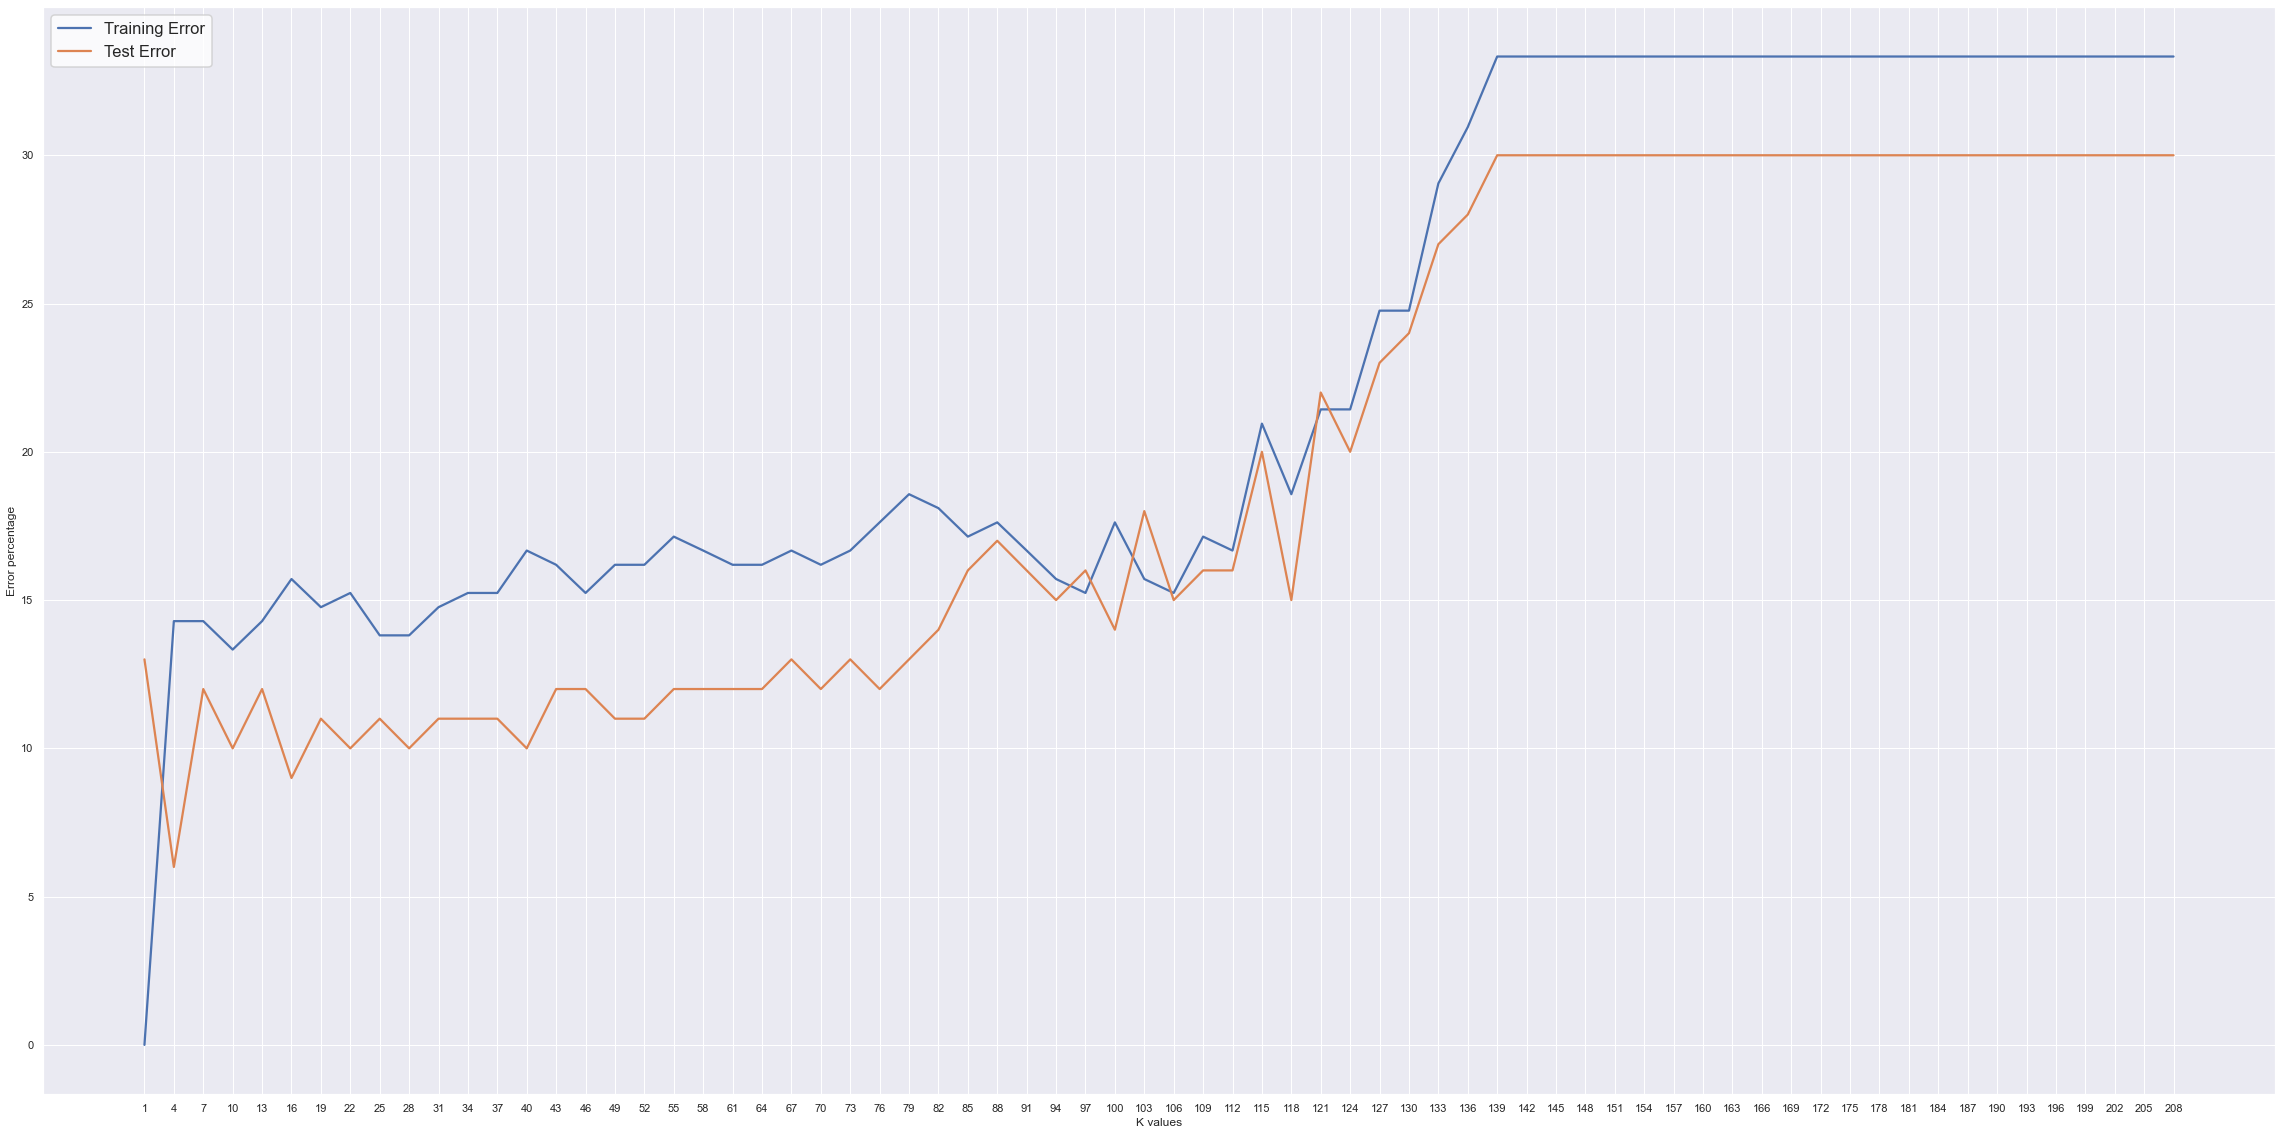

In [22]:
k_List = [(208 - 3*i) for i in range(0,70) if (208-3*i)>0]

knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
Error_train = []
Error_test = []
MaxtestScore, Optimal_k = 0, 0
for k in k_List:
    knn.n_neighbors=k
    knn.fit(Xtrain,Ytrain)
    Y_pred = knn.predict(Xtest)
    
    train_error = 1 - knn.score(Xtrain,Ytrain)
    Error_train.append(round(train_error*100,2))
    Train_Error_Records.append(train_error)
    
    test_error = 1 - knn.score(Xtest,Ytest)
    Error_test.append(round(test_error*100,2))
    
    testScore = knn.score(Xtest,Ytest)
    if MaxtestScore < testScore:
        MaxtestScore = testScore
        Optimal_k = k

#plt.plot(np.array(k_List), np.array(Error_train))
fig,ax=plt.subplots(nrows=1,ncols=1,figsize=(40,20))

plt.xlabel("K values")
plt.ylabel("Error percentage")
sns.set(style='whitegrid', context='talk', palette='rainbow')
ax.legend()
sns.lineplot(x=k_List, y=Error_train, markers=True, dashes=False , ax = ax)
sns.lineplot(x=k_List, y=Error_test, markers=True, dashes=False , ax=ax)
plt.xticks(k_List)
plt.legend(labels=['Training Error', 'Test Error'])
plt.show()

In [23]:
print(f"Best k: {Optimal_k}, and Best Test Accuracy: {MaxtestScore}")

Best k: 4, and Best Test Accuracy: 0.94


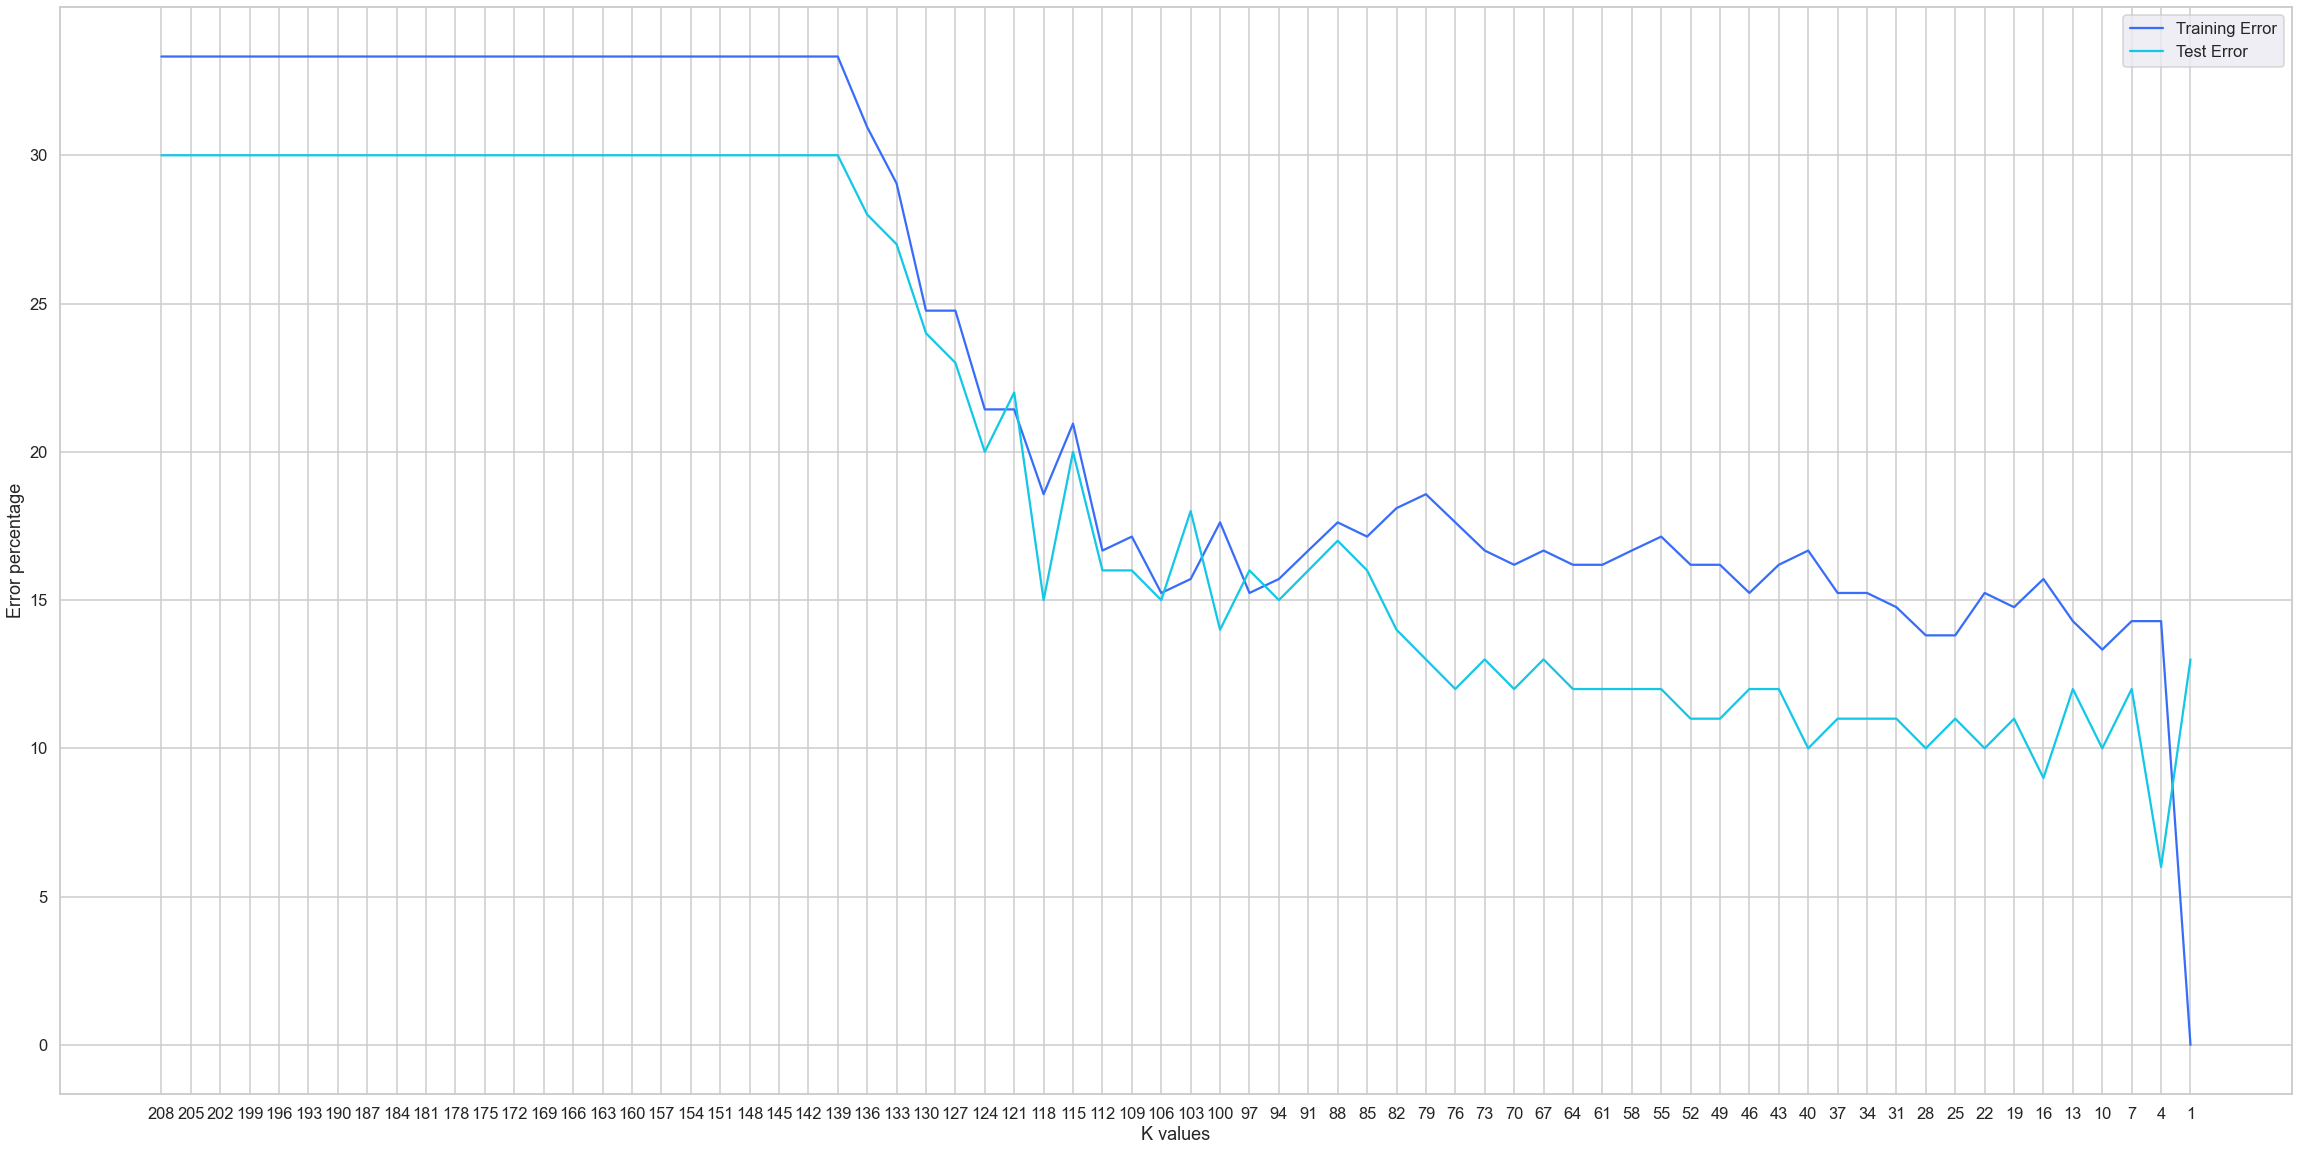

In [24]:
fig,ax=plt.subplots(nrows=1,ncols=1,figsize=(40,20))
plt.xlabel("K values")
plt.ylabel("Error percentage")

sns.set(context='talk')
ax.invert_xaxis()
plt.legend(labels=['Training Error', 'Test Error'])
sns.lineplot(x=k_List, y=Error_train, markers=True, dashes=False , ax = ax)
sns.lineplot(x=k_List, y=Error_test, markers=True, dashes=False , ax=ax)
plt.xticks(k_List)
plt.legend(labels=['Training Error', 'Test Error'])
plt.show()

In [25]:
#Dynamic Plot
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)
df_k_error = pd.DataFrame({'k Values': k_List,'Training Error':Error_train, 'Testing errors':Error_test})
df_k_error.iplot(x='k Values', y=['Training Error','Testing errors'] , xTitle='K Values', yTitle='Percentage Error')

In [26]:
#Calculate the confusion matrix, true positive rate, true negative rate, precision, and F1-score when k = k∗.2
def SummarizeTable(Header, Content):
    Table = BeautifulTable(max_width=160)
    Table.column_headers = Header
    for ele in Content:
        Table.append_row(ele)
    print(Table)
#SummarizeTable(['sn','temp1','temp2'],[['1bh','2da','wdx']])

knn = KNeighborsClassifier(n_neighbors=Optimal_k, metric='euclidean')
knn.fit(Xtrain,Ytrain)
Ypred = knn.predict(Xtest)

CF_Matrix = confusion_matrix(Ytest,Ypred)
TP = CF_Matrix[0,0] / (CF_Matrix[0,0] + CF_Matrix[0,1])
TN = CF_Matrix[1,1] / (CF_Matrix[1,0] + CF_Matrix[1,1])

Header = ['Best k','Confusion matrix','F1 Score','True Positive Rate',
          'True Negative Rate','Training score','Precision Score','Test Accuracy']   
Content = [[Optimal_k, CF_Matrix,f1_score(Ytest,Ypred,average='macro'),TP,
           TN,knn.score(Xtrain,Ytrain),precision_score(Ytest,Ypred),accuracy_score(Ytest,Ypred)]]

SummarizeTable(Header,Content)

+--------+------------------+----------+--------------------+--------------------+----------------+-----------------+---------------+
| Best k | Confusion matrix | F1 Score | True Positive Rate | True Negative Rate | Training score | Precision Score | Test Accuracy |
+--------+------------------+----------+--------------------+--------------------+----------------+-----------------+---------------+
|   4    |     [[25  5]     |  0.926   |       0.833        |       0.986        |     0.857      |      0.932      |     0.94      |
|        |     [ 1 69]]     |          |                    |                    |                |                 |               |
+--------+------------------+----------+--------------------+--------------------+----------------+-----------------+---------------+


#### iii. Learning Curve
```Since the computation time depends on the size of the training set, one may only use a subset of the training set. Plot the best test error rate which is obtained by some value of k, against the size of training set, when the size of training set is N ∈ {10, 20, 30, . . . , 210}.4 Note: for each N, select your training set by choosing the first N/3 rows of Class 0 and the first N − N/3 rows of Class 1 in the training set you created in 1(b)iii. Also, for each N, select the optimal k from a set starting from k = 1, increasing by 5. For example, if N = 200, the optimal k is selected from {1, 6, 11, . . . , 196}. This plot is called a Learning Curve.```

In [27]:
range_n = [10*x for x in range(1,22)]
range_k = [1+(x-1)*5 for x in range(1,41)]
BestTestError = [0 for x in range(0,21)]
dfTraining = pd.read_csv('../data/vertebral_column_data/TrainingDataset.csv')
dfTest = pd.read_csv('../data/vertebral_column_data/TestDataset.csv')
dfTest = dfTest.reset_index(drop=True)
dfTrainclass0 , dfTrainclass1 = dfTraining[dfTraining['class']==0] , dfTraining[dfTraining['class']==1]
i=0
for N in range_n:
    MaxtestScore, Optimal_k = 0, 0
    N0, N1 = round(N/3), round(2*N/3)
    NewTrainSet = dfTrainclass0.iloc[:N0].append(dfTrainclass1.iloc[:N1])
    NewTrainSet = NewTrainSet.reset_index(drop=True)
    #print(len(NewTrainSet),"---")
    Xtrain,Ytrain = NewTrainSet.drop(columns = ['class']), NewTrainSet['class']
    Xtest, Ytest = dfTest.drop(columns = ['class']), dfTest['class']
    #print("Shape train: ",Xtrain.shape, Ytrain.shape)
    #print("Shape test: ",Xtest.shape, Ytest.shape)
    
    for k in range_k:
        if k <= N:
            knn = KNeighborsClassifier()
            knn.n_neighbors = k
            knn.fit(Xtrain, Ytrain)
            testScore = knn.score(Xtest,Ytest)
            Ypred = knn.predict(Xtest)
            #print(testScore)
            if MaxtestScore < testScore:
                MaxtestScore = testScore
                Optimal_k = k
                #print(MaxtestScore)
    #print(N,":",Optimal_k)
    BestTestError[i] = 1 - MaxtestScore
    i = i+1
    
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)
df_k_error = pd.DataFrame({'N values': range_n,'Best Test Error':BestTestError})
df_k_error.iplot(x='N values', y='Best Test Error' , xTitle='N values (number of training set)', yTitle='Best Test Error')    

### (d) Other Metrics
```
Replace the Euclidean metric with the following metrics and test them. Summarize the test errors          (i.e., when k = k∗) in a table. Use all of your training data and select the best k when {1, 6,.., 196}.

i. Minkowski Distance:
A. which becomes Manhattan Distance with p = 1.
B. with log10(p) ∈ {0.1, 0.2, 0.3, . . . , 1}. In this case, use the k∗ you found for the Manhattan distance in 1(d)iA. What is the best log10(p)?
C. which becomes Chebyshev Distance with p → ∞

ii. Mahalanobis Distance
```

#### i. Minkowski Distance.

##### A. Manhattan Distance with p = 1.

In [28]:
Optimal_k, MaxtestScore = 0, 0
Error_test = []
for k in range_k:
    knn = KNeighborsClassifier(metric='minkowski', p=1 , n_neighbors = k)
    Xtrain,Ytrain = dfTraining.drop(columns = ['class']), dfTraining['class']
    
    knn.fit(Xtrain, Ytrain)
    testScore = knn.score(Xtest,Ytest)
    Ypred = knn.predict(Xtest)
    Train_Error_Records.append(1-knn.score(Xtrain,Ytrain))
    Error_test.append(1-testScore)
    #print(testScore)
    if MaxtestScore < testScore and k>1:
        MaxtestScore = testScore
        Optimal_k = k

CF_Matrix = confusion_matrix(Ytest,Ypred)

Header_Manhattan = ['Max Test Accuracy','Best k value','Test Error','Confusion matrix','F1 Score','Training score','Precision Score']   
Content_Manhattan = [[MaxtestScore,Optimal_k,1-MaxtestScore,CF_Matrix,f1_score(Ytest,Ypred,average='macro')
                      ,knn.score(Xtrain,Ytrain),precision_score(Ytest,Ypred)]]

SummarizeTable(Header_Manhattan,Content_Manhattan)
df_k_error = pd.DataFrame({'k Values': range_k,'Testing errors':Error_test})
df_k_error.iplot(x='k Values', y='Testing errors', xTitle='K Values', yTitle='Test Error')

+-------------------+--------------+------------+------------------+----------+----------------+-----------------+
| Max Test Accuracy | Best k value | Test Error | Confusion matrix | F1 Score | Training score | Precision Score |
+-------------------+--------------+------------+------------------+----------+----------------+-----------------+
|       0.89        |      6       |    0.11    |     [[ 0 30]     |  0.412   |     0.667      |       0.7       |
|                   |              |            |     [ 0 70]]     |          |                |                 |
+-------------------+--------------+------------+------------------+----------+----------------+-----------------+


##### B. With log10(p) in {0.1, 0.2, 0.3, ... ,1}.

In [29]:
bestscore, bestlogP = 0, 0
i = 0.1

L_logp, L_TestError, L_TestScore = [],[],[]

while i <= 1:
    knn = KNeighborsClassifier( p=pow(10,i), n_neighbors= 6, metric = 'minkowski')
    knn.fit(Xtrain,Ytrain)
    i = round(i,1)
    testScore=knn.score(Xtest,Ytest,sample_weight=None)
    Ypred = knn.predict(Xtest)
    L_logp.append(i)
    L_TestScore.append(testScore)
    L_TestError.append(round(1-testScore,2))
    Train_Error_Records.append(1-knn.score(Xtrain,Ytrain))
    if testScore > bestscore:
        bestscore = testScore
        #print(bestscore)
        logP = i
    i = i + 0.1
Header = ["log1(P)","Test Accuracy","Test Error"]
#Content = [[L_logp,L_TestScore,L_TestError]]
Content = list(zip(L_logp,L_TestScore,L_TestError))
SummarizeTable(Header,Content)

print(f"Best Test Score = {bestscore}, Lowest Test Error = {round(1-bestscore,2)} at log10(P) = {logP} ")

+---------+---------------+------------+
| log1(P) | Test Accuracy | Test Error |
+---------+---------------+------------+
|   0.1   |     0.91      |    0.09    |
+---------+---------------+------------+
|   0.2   |     0.91      |    0.09    |
+---------+---------------+------------+
|   0.3   |     0.92      |    0.08    |
+---------+---------------+------------+
|   0.4   |     0.92      |    0.08    |
+---------+---------------+------------+
|   0.5   |     0.92      |    0.08    |
+---------+---------------+------------+
|   0.6   |     0.94      |    0.06    |
+---------+---------------+------------+
|   0.7   |     0.93      |    0.07    |
+---------+---------------+------------+
|   0.8   |     0.92      |    0.08    |
+---------+---------------+------------+
|   0.9   |     0.91      |    0.09    |
+---------+---------------+------------+
|   1.0   |     0.91      |    0.09    |
+---------+---------------+------------+
Best Test Score = 0.94, Lowest Test Error = 0.06 at log10

##### C. Chebyshev Distance With p -> infinity.

In [30]:
Optimal_k, MaxtestScore = 0, 0
Error_test = []
for k in range_k:
    knn = KNeighborsClassifier(metric='chebyshev', p=float('inf') , n_neighbors = k)
    Xtrain,Ytrain = dfTraining.drop(columns = ['class']), dfTraining['class']
    
    knn.fit(Xtrain, Ytrain)
    testScore = knn.score(Xtest,Ytest)
    Ypred = knn.predict(Xtest)
    Error_test.append(1-testScore)
    Train_Error_Records.append(1-knn.score(Xtrain,Ytrain))
    
    #print(testScore)
    if MaxtestScore < testScore and k>1:
        MaxtestScore = testScore
        Optimal_k = k

CF_Matrix = confusion_matrix(Ytest,Ypred)

Header_Chebyshev = ['Max Test Accuracy','Best k value','Test Error','Confusion matrix','F1 Score','Training score','Precision Score']
Content_Chebyshev = [[MaxtestScore,Optimal_k,1-MaxtestScore,CF_Matrix,f1_score(Ytest,Ypred,average='macro')
                      ,knn.score(Xtrain,Ytrain),precision_score(Ytest,Ypred)]]

SummarizeTable(Header_Chebyshev,Content_Chebyshev)
df_k_error = pd.DataFrame({'k Values': range_k,'Testing errors':Error_test})
df_k_error.iplot(x='k Values', y='Testing errors', xTitle='K Values', yTitle='Test Error', title='Chebyshev Distance With p -> infinity')  

+-------------------+--------------+------------+------------------+----------+----------------+-----------------+
| Max Test Accuracy | Best k value | Test Error | Confusion matrix | F1 Score | Training score | Precision Score |
+-------------------+--------------+------------+------------------+----------+----------------+-----------------+
|       0.92        |      16      |    0.08    |     [[ 0 30]     |  0.412   |     0.667      |       0.7       |
|                   |              |            |     [ 0 70]]     |          |                |                 |
+-------------------+--------------+------------+------------------+----------+----------------+-----------------+


#### ii. Mahalanobis Distance

In [31]:
Optimal_k, MaxtestScore = 0, 0
Error_test = []
Params = np.linalg.pinv(Xtrain.cov())
for k in range_k:
    knn = KNeighborsClassifier(metric='mahalanobis', metric_params={'VI': Params} , n_neighbors = k)
    Xtrain,Ytrain = dfTraining.drop(columns = ['class']), dfTraining['class']
    
    knn.fit(Xtrain, Ytrain)
    testScore = knn.score(Xtest,Ytest)
    Ypred = knn.predict(Xtest)
    Error_test.append(1-testScore)
    Train_Error_Records.append(1-knn.score(Xtrain,Ytrain))
    
    #print(testScore)
    if MaxtestScore < testScore and k>1:
        MaxtestScore = testScore
        Optimal_k = k

CF_Matrix = confusion_matrix(Ytest,Ypred)

Header_Mahalanobis = ['Max Test Accuracy','Best k value','Test Error','Confusion matrix','F1 Score','Training score','Precision Score']  
Content_Mahalanobis = [[MaxtestScore,Optimal_k,1-MaxtestScore,CF_Matrix,f1_score(Ytest,Ypred,average='macro')
                      ,knn.score(Xtrain,Ytrain),precision_score(Ytest,Ypred)]]

SummarizeTable(Header_Mahalanobis,Content_Mahalanobis)
df_k_error = pd.DataFrame({'k Values': range_k,'Testing errors':Error_test})
df_k_error.iplot(x='k Values', y='Testing errors', xTitle='K Values', yTitle='Test Error', title='Mahalanobis Distance')  

+-------------------+--------------+------------+------------------+----------+----------------+-----------------+
| Max Test Accuracy | Best k value | Test Error | Confusion matrix | F1 Score | Training score | Precision Score |
+-------------------+--------------+------------+------------------+----------+----------------+-----------------+
|       0.84        |      6       |    0.16    |     [[ 0 30]     |  0.412   |     0.667      |       0.7       |
|                   |              |            |     [ 0 70]]     |          |                |                 |
+-------------------+--------------+------------+------------------+----------+----------------+-----------------+


In [32]:
#Summarize all three in a table
Header_combined = ['Metrics','Max Test Accuracy','Best k value','Test Error','Confusion matrix','F1 Score','Training score','Precision Score']  
Content_Manhattan[0].insert(0,'Manhattan')
Content_Chebyshev[0].insert(0,'Chebyshev')
Content_Mahalanobis[0].insert(0,'Mahalanobis')
Content_combined = [Content_Manhattan[0],Content_Chebyshev[0], Content_Mahalanobis[0]]  

SummarizeTable(Header_combined,Content_combined)
#Content_combined

+-------------+-------------------+--------------+------------+------------------+----------+----------------+-----------------+
|   Metrics   | Max Test Accuracy | Best k value | Test Error | Confusion matrix | F1 Score | Training score | Precision Score |
+-------------+-------------------+--------------+------------+------------------+----------+----------------+-----------------+
|  Manhattan  |       0.89        |      6       |    0.11    |     [[ 0 30]     |  0.412   |     0.667      |       0.7       |
|             |                   |              |            |     [ 0 70]]     |          |                |                 |
+-------------+-------------------+--------------+------------+------------------+----------+----------------+-----------------+
|  Chebyshev  |       0.92        |      16      |    0.08    |     [[ 0 30]     |  0.412   |     0.667      |       0.7       |
|             |                   |              |            |     [ 0 70]]     |          |    

### (e) Weighted Decision

```
Euclidean Distance
```

In [33]:
Optimal_k, MaxtestScore = 0, 0
Error_test = []
for k in range_k:
    knn = KNeighborsClassifier(metric='euclidean', p=2 , n_neighbors = k, weights='distance')
    Xtrain,Ytrain = dfTraining.drop(columns = ['class']), dfTraining['class']
    
    knn.fit(Xtrain, Ytrain)
    testScore = knn.score(Xtest,Ytest)
    Ypred = knn.predict(Xtest)
    Error_test.append(1-testScore)
    Train_Error_Records.append(1-knn.score(Xtrain,Ytrain))
    
    #print(testScore)
    if MaxtestScore < testScore and k>1:
        MaxtestScore = testScore
        Optimal_k = k

CF_Matrix = confusion_matrix(Ytest,Ypred)

Header_WEuclidean = ['Max Test Accuracy','Best k value','Test Error','Confusion matrix','F1 Score','Training score','Precision Score']   
Content_WEuclidean = [[MaxtestScore,Optimal_k,1-MaxtestScore,CF_Matrix,f1_score(Ytest,Ypred,average='weighted'),
                       knn.score(Xtrain,Ytrain),precision_score(Ytest,Ypred)]]

SummarizeTable(Header_WEuclidean,Content_WEuclidean)
df_k_error = pd.DataFrame({'k Values': range_k,'Testing errors':Error_test})
df_k_error.iplot(x='k Values', y='Testing errors', xTitle='K Values', yTitle='Test Error', title='Weighted Euclidean Metrics')

+-------------------+--------------+------------+------------------+----------+----------------+-----------------+
| Max Test Accuracy | Best k value | Test Error | Confusion matrix | F1 Score | Training score | Precision Score |
+-------------------+--------------+------------+------------------+----------+----------------+-----------------+
|        0.9        |      6       |    0.1     |     [[ 2 28]     |  0.621   |      1.0       |      0.714      |
|                   |              |            |     [ 0 70]]     |          |                |                 |
+-------------------+--------------+------------+------------------+----------+----------------+-----------------+


~~~
Manhattan Distance
~~~

In [34]:
Optimal_k, MaxtestScore = 0, 0
Error_test = []
for k in range_k:
    knn = KNeighborsClassifier(metric='minkowski', p=1 , n_neighbors = k, weights='distance')
    Xtrain,Ytrain = dfTraining.drop(columns = ['class']), dfTraining['class']
    
    knn.fit(Xtrain, Ytrain)
    testScore = knn.score(Xtest,Ytest)
    Ypred = knn.predict(Xtest)
    Error_test.append(1-testScore)
    Train_Error_Records.append(1-knn.score(Xtrain,Ytrain))
    
    #print(testScore)
    if MaxtestScore < testScore and k>1:
        MaxtestScore = testScore
        Optimal_k = k

CF_Matrix = confusion_matrix(Ytest,Ypred)

Header_WManhattan = ['Max Test Accuracy','Best k value','Test Error','Confusion matrix','F1 Score','Training score','Precision Score']   
Content_WManhattan = [[MaxtestScore,Optimal_k,1-MaxtestScore,CF_Matrix,f1_score(Ytest,Ypred,average='weighted'),
                       knn.score(Xtrain,Ytrain),precision_score(Ytest,Ypred)]]

SummarizeTable(Header_WManhattan,Content_WManhattan)
df_k_error = pd.DataFrame({'k Values': range_k,'Testing errors':Error_test})
df_k_error.iplot(x='k Values', y='Testing errors', xTitle='K Values', yTitle='Test Error', title='Weighted Manhattan Metrics')

+-------------------+--------------+------------+------------------+----------+----------------+-----------------+
| Max Test Accuracy | Best k value | Test Error | Confusion matrix | F1 Score | Training score | Precision Score |
+-------------------+--------------+------------+------------------+----------+----------------+-----------------+
|        0.9        |      26      |    0.1     |     [[ 1 29]     |  0.599   |      1.0       |      0.707      |
|                   |              |            |     [ 0 70]]     |          |                |                 |
+-------------------+--------------+------------+------------------+----------+----------------+-----------------+


~~~
Chebyshev
~~~

In [35]:
Optimal_k, MaxtestScore = 0, 0
Error_test = []
for k in range_k:
    knn = KNeighborsClassifier(metric='chebyshev', p=float('inf') , n_neighbors = k , weights='distance')
    Xtrain,Ytrain = dfTraining.drop(columns = ['class']), dfTraining['class']
    
    knn.fit(Xtrain, Ytrain)
    testScore = knn.score(Xtest,Ytest)
    Ypred = knn.predict(Xtest)
    Error_test.append(1-testScore)
    Train_Error_Records.append(1-knn.score(Xtrain,Ytrain))
    
    #print(testScore)
    if MaxtestScore < testScore and k>1:
        MaxtestScore = testScore
        Optimal_k = k

CF_Matrix = confusion_matrix(Ytest,Ypred)

Header_WChebyshev = ['Max Test Accuracy','Best k value','Test Error','Confusion matrix','F1 Score','Training score','Precision Score']   
Content_WChebyshev = [[MaxtestScore,Optimal_k,1-MaxtestScore,CF_Matrix,f1_score(Ytest,Ypred,average='weighted'),
                       knn.score(Xtrain,Ytrain),precision_score(Ytest,Ypred)]]

SummarizeTable(Header_WChebyshev,Content_WChebyshev)
df_k_error = pd.DataFrame({'k Values': range_k,'Testing errors':Error_test})
df_k_error.iplot(x='k Values', y='Testing errors', xTitle='K Values', yTitle='Test Error', title = 'Weighted Chebyshev Metrics')  

+-------------------+--------------+------------+------------------+----------+----------------+-----------------+
| Max Test Accuracy | Best k value | Test Error | Confusion matrix | F1 Score | Training score | Precision Score |
+-------------------+--------------+------------+------------------+----------+----------------+-----------------+
|       0.89        |      16      |    0.11    |     [[ 2 28]     |  0.621   |      1.0       |      0.714      |
|                   |              |            |     [ 0 70]]     |          |                |                 |
+-------------------+--------------+------------+------------------+----------+----------------+-----------------+


In [36]:
#Summarize all three metrics with weights

Header_combined = ['Metrics','Max Test Accuracy','Best k value','Test Error','Confusion matrix','F1 Score','Training score','Precision Score']
Content_WManhattan[0].insert(0,'Manhattan')
Content_WEuclidean[0].insert(0,'Euclidean')
Content_WChebyshev[0].insert(0,'Chebyshev')
Content_combined = [Content_WEuclidean[0],Content_WManhattan[0],Content_WChebyshev[0]]  

SummarizeTable(Header_combined,Content_combined)

+-----------+-------------------+--------------+------------+------------------+----------+----------------+-----------------+
|  Metrics  | Max Test Accuracy | Best k value | Test Error | Confusion matrix | F1 Score | Training score | Precision Score |
+-----------+-------------------+--------------+------------+------------------+----------+----------------+-----------------+
| Euclidean |        0.9        |      6       |    0.1     |     [[ 2 28]     |  0.621   |      1.0       |      0.714      |
|           |                   |              |            |     [ 0 70]]     |          |                |                 |
+-----------+-------------------+--------------+------------+------------------+----------+----------------+-----------------+
| Manhattan |        0.9        |      26      |    0.1     |     [[ 1 29]     |  0.599   |      1.0       |      0.707      |
|           |                   |              |            |     [ 0 70]]     |          |                |   

### (f) Training Error Rate

In [37]:
min(Train_Error_Records)

0.0

In [ ]:
Params = np.linalg.pinv(Xtrain.cov())
for k in KList:
    knn = KNeighborsClassifier(metric='mahalanobis', metric_params={'VI': Params} , n_neighbors = k)